In [1]:
# import dataset 
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
Customer_Churn_Prediction=pd.read_csv('Customer-Churn-Prediction.csv')

In [2]:
Customer_Churn_Prediction.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [3]:
Customer_Churn_Prediction.shape

(7043, 21)

In [4]:
Customer_Churn_Prediction.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
Customer_Churn_Prediction.dropna(inplace=True)

In [6]:
Customer_Churn_Prediction.drop('customerID',axis=1,inplace=True)

In [7]:
Customer_Churn_Prediction.drop_duplicates(inplace=True)

In [8]:
Customer_Churn_Prediction.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.013975,0.218811,0.101230
tenure,0.013975,1.000000,0.244184,0.825286
MonthlyCharges,0.218811,0.244184,1.000000,0.650540
TotalCharges,0.101230,0.825286,0.650540,1.000000


# Visualization And Analysis

<AxesSubplot:>

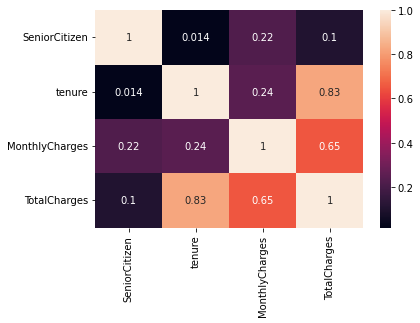

In [9]:
sb.heatmap( Customer_Churn_Prediction.corr(),annot=True)

In [10]:
Customer_Churn_Prediction.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [11]:
Customer_Churn_Prediction['Churn'].value_counts()

No     5153
Yes    1857
Name: Churn, dtype: int64

In [12]:
1869/(5163+1869)

0.26578498293515357

<AxesSubplot:xlabel='Churn', ylabel='count'>

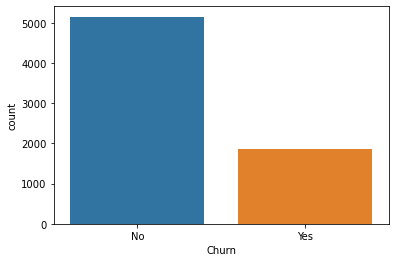

In [13]:
import warnings as w
w.filterwarnings('ignore')
sb.countplot(Customer_Churn_Prediction['Churn'])

In [14]:
Customer_Churn_Prediction['gender'].value_counts()

Male      3535
Female    3475
Name: gender, dtype: int64

In [15]:
3475/(3535+3475)

0.4957203994293866

In [16]:
3535/(3535+3475)

0.5042796005706134

<AxesSubplot:xlabel='gender', ylabel='count'>

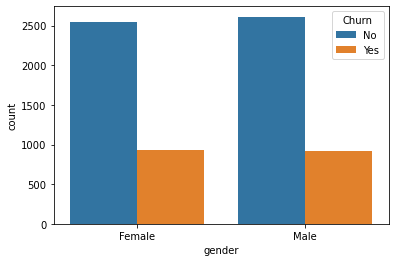

In [17]:
sb.countplot('gender',data=Customer_Churn_Prediction,hue='Churn')

In [18]:
Customer_Churn_Prediction.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [19]:
Customer_Churn_Prediction['PhoneService'].value_counts()

Yes    6330
No      680
Name: PhoneService, dtype: int64

In [20]:
680/(680+6330)

0.09700427960057062

<AxesSubplot:xlabel='Churn', ylabel='count'>

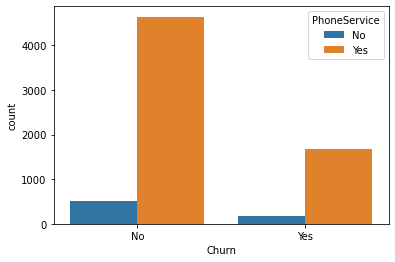

In [21]:
sb.countplot('Churn',data=Customer_Churn_Prediction,hue='PhoneService')

In [22]:
Customer_Churn_Prediction.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [23]:
Customer_Churn_Prediction['InternetService'].value_counts()

Fiber optic    3090
DSL            2414
No             1506
Name: InternetService, dtype: int64

<AxesSubplot:xlabel='InternetService', ylabel='count'>

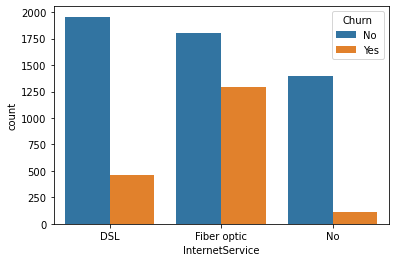

In [24]:
sb.countplot('InternetService',data=Customer_Churn_Prediction,hue='Churn')

In [25]:
Customer_Churn_Prediction.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


# Encoding

# Label-Encoder

In [26]:
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype

In [27]:
lr=LabelEncoder()

In [28]:
for i in Customer_Churn_Prediction.columns:
    if is_numeric_dtype(Customer_Churn_Prediction[i]):
        continue
    else:
        Customer_Churn_Prediction[i]=lr.fit_transform(Customer_Churn_Prediction[i])

In [29]:
Customer_Churn_Prediction.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0


# Data Seperate

In [30]:
x = Customer_Churn_Prediction.drop('Churn',axis=1)
y = Customer_Churn_Prediction[['Churn']]

In [31]:
x.shape

(7010, 19)

In [32]:
y.shape

(7010, 1)

# Imbalanced Data Handling 

In [33]:
Customer_Churn_Prediction['Churn'].value_counts()

0    5153
1    1857
Name: Churn, dtype: int64

# Synthetic Minority Oversampling Technique (SMOTETomek)

In [34]:
from imblearn.combine import SMOTETomek

In [35]:
sm= SMOTETomek(random_state=42)

In [36]:
new_x,new_y = sm.fit_resample(x,y)

In [37]:
new_y.value_counts()

Churn
0        4794
1        4794
dtype: int64

# Cross Validation

In [38]:
from sklearn.model_selection import train_test_split as tts

In [39]:
xtrain,xtest,ytrain,ytest=tts(new_x,new_y,train_size=70,random_state=41)

# Decision-Tree-Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dtc = DecisionTreeClassifier()

In [42]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [43]:
dtc.score(xtest,ytest)

0.7403866358478672

# XGB-Classifier

In [44]:
!pip install xgboost

In [45]:
import xgboost 
from xgboost import XGBClassifier

In [46]:
xgb = XGBClassifier()

In [47]:
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [48]:
xgb.score(xtest,ytest)

0.7690691321706241

# Ada-Boost-Classifier

In [49]:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
adc = AdaBoostClassifier()

In [51]:
adc.fit(xtrain,ytrain)

AdaBoostClassifier()

In [52]:
adc.score(xtest,ytest)

0.7579323387266232

# K Fold Cross Validation

In [69]:
from sklearn.model_selection import KFold, cross_val_score,cross_validate

In [70]:
kfd = KFold(n_splits=4)

In [71]:
result =  cross_val_score(xgb, new_x, new_y,cv=kfd)

In [72]:
result

array([0.80141844, 0.79349186, 0.85982478, 0.93825615])

In [73]:
result.mean()

0.8482478097622028

In [74]:
result.max()

0.9382561535252398

In [75]:
result.min()

0.7934918648310388

In [76]:
cross_validate = cross_validate(xgb,new_x,new_y,cv=kfd)

In [77]:
cross_validate

{'fit_time': array([0.76019573, 0.76324654, 0.74994946, 0.73432446]),
 'score_time': array([0.        , 0.        , 0.        , 0.01562548]),
 'test_score': array([0.80141844, 0.79349186, 0.85982478, 0.93825615])}

In [78]:
result1 = cross_val_score(adc,new_x,new_y,cv=kfd)

In [79]:
result1

array([0.7780559 , 0.76136838, 0.83771381, 0.84021694])

In [80]:
result1.mean()

0.8043387567793074

In [81]:
result1.min()

0.7613683771380892

In [82]:
result1.max()

0.8402169378389653

In [84]:
result2 = cross_val_score(dtc,new_x,new_y,cv=kfd)

In [85]:
result2

array([0.75385899, 0.73925741, 0.79808093, 0.82102628])

In [86]:
result2.mean()

0.7780559032123489

In [87]:
result2.min()

0.7392574050896955

In [88]:
result2.max()

0.8210262828535669